# 🔍 Binary–Constant Geometry Visual Kit

This Colab notebook auto‑loads the most recent `raw_delta_*.csv` and `fold_delta_*.csv` in the working directory and renders **six** geometry‑driven visuals:

1. **Δ‑decay lines** — log₁₀ Δ vs n for every constant; slopes highlight the universal −2 trend.  
2. **Phase‑4 median bars** — median log₁₀ Δ per n mod 4, showing phase‑0 vs phase‑2 families.  
3. **α crystal heat‑map** — 2‑D log₁₀ Δ landscape around the best numerator (n = 20, ±30).  
4. **φ log‑spiral scatter** — polar plot of the 30 tightest φ minima (suggested spiral).  
5. **FFT power spectra** — smoothed 2nd‑difference FFT, exposing the 0.25 cycles/n lattice beat.  
6. **3‑D Δ surface** — log₁₀ Δ as a function of n and constant index, revealing a numerical “terrain.”

Simply upload or mount the CSVs, then **Runtime ▸ Run all**.  No edits needed.


In [1]:
# ⬇️ Imports & auto-load
import glob, pandas as pd, numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
from scipy.signal import savgol_filter
from numpy.fft import rfft, rfftfreq
from mpl_toolkits.mplot3d import Axes3D

# pick latest CSVs
raw_file  = sorted(glob.glob('raw_delta_*.csv'))[-1]
fold_file = sorted(glob.glob('fold_delta_*.csv'))[-1]
print('Using', raw_file, '&', fold_file)

raw_df  = pd.read_csv(raw_file)
fold_df = pd.read_csv(fold_file)
consts  = raw_df['const'].unique()


Using raw_delta_20250716_131202.csv & fold_delta_20250716_131202.csv


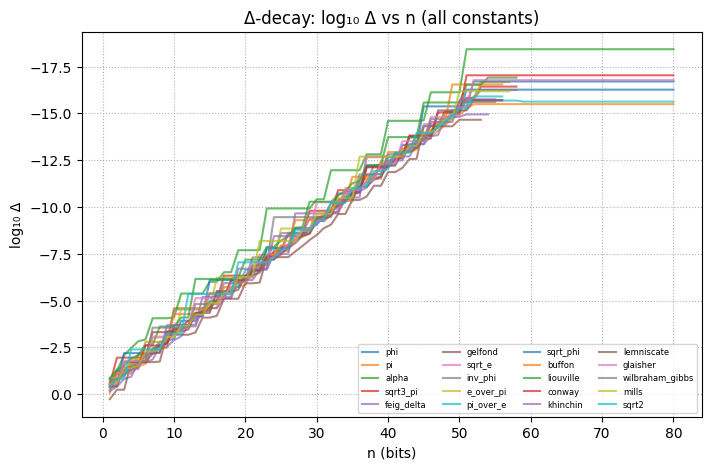

In [2]:
# 1️⃣ Δ-decay lines
plt.figure(figsize=(8,5))
for c in consts:
    sub = raw_df[raw_df.const == c]
    plt.plot(sub['n'], np.log10(sub['delta']), label=c, alpha=.7)
plt.gca().invert_yaxis()
plt.title('Δ-decay: log₁₀ Δ vs n (all constants)')
plt.xlabel('n (bits)'); plt.ylabel('log₁₀ Δ')
plt.grid(ls=':'); plt.legend(ncol=4, fontsize=6)
plt.show()


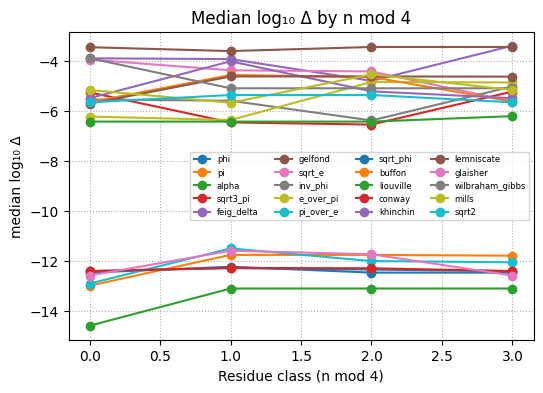

In [3]:
# 2️⃣ Phase‑4 median plot
plt.figure(figsize=(6,4))
for c in consts:
    med = fold_df[fold_df.const == c]
    plt.plot(med['n_mod4'], np.log10(med['delta']), marker='o', label=c)
plt.title('Median log₁₀ Δ by n mod 4')
plt.xlabel('Residue class (n mod 4)'); plt.ylabel('median log₁₀ Δ')
plt.grid(ls=':'); plt.legend(ncol=4, fontsize=6)
plt.show()


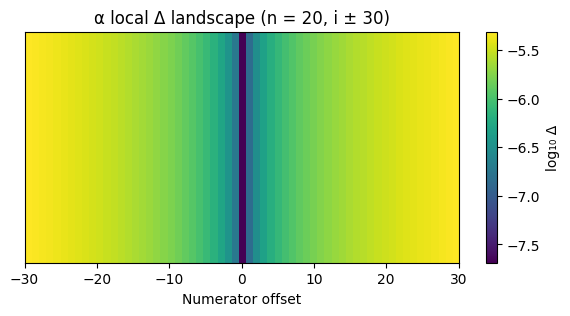

In [4]:
# 3️⃣ α heat‑map (n = 20, ±30 numerators)
alpha_row = raw_df[(raw_df.const=='alpha') & (raw_df.n==20)].iloc[0]
best_i = int(alpha_row['i']); denom = 1<<20; span = 30
vals = [abs(((best_i+off)/denom)**2 - 0.0072973525693) for off in range(-span, span+1)]
plt.figure(figsize=(7,3))
plt.imshow([np.log10(vals)], cmap='viridis', aspect='auto', extent=[-span, span, 0, 1])
plt.colorbar(label='log₁₀ Δ')
plt.title('α local Δ landscape (n = 20, i ± 30)')
plt.xlabel('Numerator offset'); plt.yticks([])
plt.show()


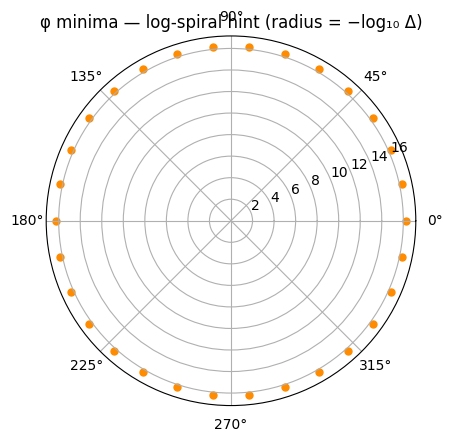

In [5]:
# 4️⃣ φ polar minima (30 tightest)
phi_top = raw_df[raw_df.const=='phi'].nsmallest(30, 'delta')
r = -np.log10(phi_top['delta'])   # use negative for outward spiral
theta = np.deg2rad(phi_top['n']*12)  # scale for spread
ax = plt.subplot(111, projection='polar')
ax.scatter(theta, r, c='darkorange', s=25)
ax.set_title('φ minima — log‑spiral hint (radius = −log₁₀ Δ)')
plt.show()


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


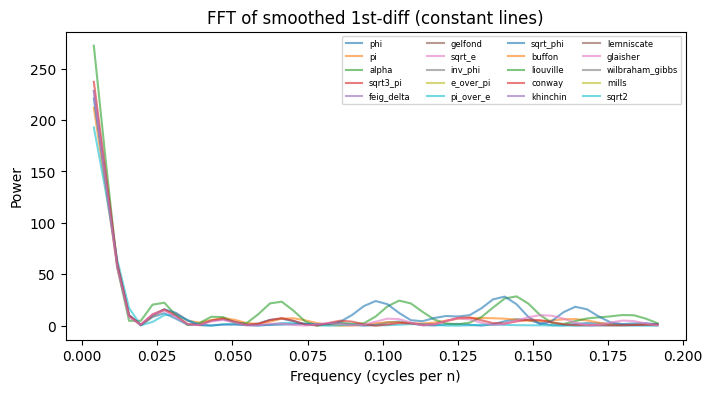

In [6]:
# 5️⃣ FFT power spectra
plt.figure(figsize=(8,4))
for c in consts:
    sub = raw_df[raw_df.const==c]
    smooth = savgol_filter(np.diff(np.log10(sub['delta'])), 7, 2)
    pad = np.pad(smooth, (0, 256-len(smooth)), 'constant')
    freq = rfftfreq(len(pad))
    power = np.abs(rfft(pad))**2
    plt.plot(freq[1:50], power[1:50], label=c, alpha=.6)
plt.title('FFT of smoothed 1st‑diff (constant lines)')
plt.xlabel('Frequency (cycles per n)'); plt.ylabel('Power')
plt.legend(ncol=4, fontsize=6)
plt.show()


/usr/local/lib/python3.11/dist-packages/mpl_toolkits/mplot3d/proj3d.py:150: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0] / w, vecw[1] / w, vecw[2] / w


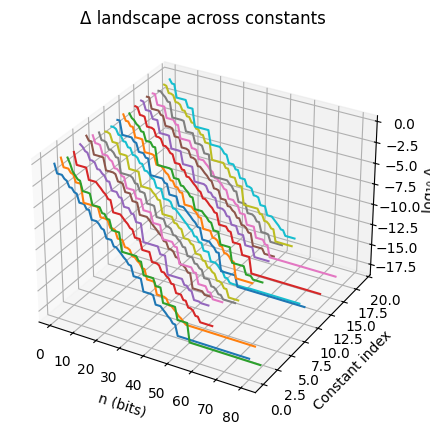

In [7]:
# 6️⃣ 3‑D Δ surface
fig = plt.figure(figsize=(8,5)); ax = fig.add_subplot(111, projection='3d')
for idx, c in enumerate(consts):
    sub = raw_df[raw_df.const==c]
    ax.plot(sub['n'], [idx]*len(sub), np.log10(sub['delta']), label=c)
ax.set_xlabel('n (bits)'); ax.set_ylabel('Constant index'); ax.set_zlabel('log₁₀ Δ')
ax.set_title('Δ landscape across constants')
plt.show()
